<a href="https://colab.research.google.com/github/kevincallan/emotion_recognition/blob/main/IncrementalFaceViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import pandas_explode 
pandas_explode.patch()

In [ ]:
!pip install pandas_explode 

  Stored in directory: /root/.cache/pip/wheels/aa/c2/cc/eeb8b1ecd2a38db5827dd73bb61068f73253c6fc20b35259c6
Successfully built pandas-explode


In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
os.chdir("/content/drive/My Drive/Memorability_assignment/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


Linear Viz https://seaborn.pydata.org/generated/seaborn.regplot.html

Mutliple regression: https://seaborn.pydata.org/examples/multiple_regression.html

In [ ]:
df_fcgt = pd.read_csv("fcgt.csv")#

In [ ]:
#tips = sns.load_dataset("tips")
sns.set(color_codes=True)
df_fcgt.head()

#tips 

,Unnamed: 0,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations,caption,face_found,oh_st_pred,oh_lt_pred,foh_st_pred,foh_lt_pred
0,0,video10.webm,0.950,34,0.900,10,couple relaxing picnic crane shot,0.0,0.824258,0.783844,0.882308,0.785015
1,1,video23.webm,0.923,67,0.826,23,videoblocks woman model released point sign an...,0.9,0.832429,0.799503,0.900630,0.805339
2,2,video26.webm,0.863,42,0.636,11,two walking businessman,0.9,0.807064,0.757043,0.841046,0.743619
3,3,video66.webm,0.850,45,0.889,18,mountain climber scaling face mountain,0.0,0.792733,0.742860,0.827716,0.731999
4,4,video67.webm,0.763,58,0.900,10,shadow helicopter hovering airport runway,0.0,0.801163,0.753047,0.846355,0.749461


In [ ]:
df_fcgt['oh_st_error'] = df_fcgt['short-term_memorability'] - df_fcgt['oh_st_pred'].astype(float)
df_fcgt['oh_lt_error'] = df_fcgt['long-term_memorability'] - df_fcgt['oh_lt_pred'].astype(float)
df_fcgt['foh_st_error'] = df_fcgt['short-term_memorability'] - df_fcgt['foh_st_pred'].astype(float)
df_fcgt['foh_lt_error'] = df_fcgt['long-term_memorability'] - df_fcgt['foh_lt_pred'].astype(float)

In [ ]:
df_fcgt.head()

,Unnamed: 0,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations,caption,face_found,oh_st_pred,oh_lt_pred,foh_st_pred,foh_lt_pred,oh_st_error,oh_lt_error,foh_st_error,foh_lt_error
0,0,video10.webm,0.950,34,0.900,10,couple relaxing picnic crane shot,0.0,0.824258,0.783844,0.882308,0.785015,0.125742,0.116156,0.067692,0.114985
1,1,video23.webm,0.923,67,0.826,23,videoblocks woman model released point sign an...,0.9,0.832429,0.799503,0.900630,0.805339,0.090571,0.026497,0.022370,0.020661
2,2,video26.webm,0.863,42,0.636,11,two walking businessman,0.9,0.807064,0.757043,0.841046,0.743619,0.055936,-0.121043,0.021954,-0.107619
3,3,video66.webm,0.850,45,0.889,18,mountain climber scaling face mountain,0.0,0.792733,0.742860,0.827716,0.731999,0.057267,0.146140,0.022284,0.157001
4,4,video67.webm,0.763,58,0.900,10,shadow helicopter hovering airport runway,0.0,0.801163,0.753047,0.846355,0.749461,-0.038163,0.146953,-0.083355,0.150539


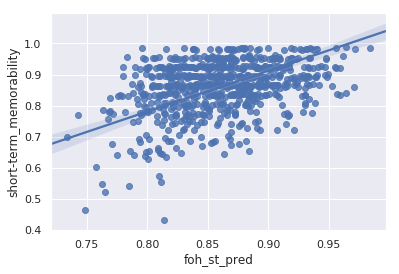

In [ ]:
ax = sns.regplot(x="foh_st_pred", y="short-term_memorability", data=df_fcgt, x_jitter=.05)

In [ ]:
# # Plot sepal with as a function of sepal_length across days
# g = sns.lmplot(x="oh_lt_pred", y="short-term_memorability", hue="video",
#                truncate=True, height=5, data=df_fcgt)

# # Use more informative axis labels than are provided by default
# g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

In [ ]:
sns.set(style="darkgrid")

True


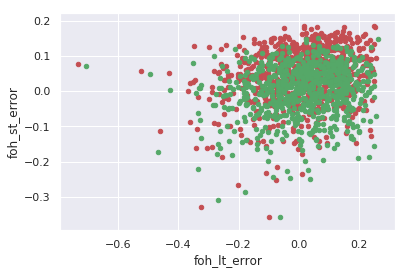

In [ ]:

df  = df_fcgt


ax1 = df.plot(kind='scatter', x='oh_lt_error', y='oh_st_error', color='r')    
ax2 = df.plot(kind='scatter', x='foh_lt_error', y='foh_st_error', color='g', ax=ax1)    

print(ax1 == ax2)  # True

In [ ]:
#g = sns.pairplot(df_fcgt, palette="Set2", diag_kind="kde", height=2.5)




df_prep = df_fcgt[['oh_st_error', 'oh_lt_error', 'foh_st_error','foh_lt_error']].copy()

In [ ]:
df_prep.head()

,oh_st_error,oh_lt_error,foh_st_error,foh_lt_error
0,0.125742,0.116156,0.067692,0.114985
1,0.090571,0.026497,0.022370,0.020661
2,0.055936,-0.121043,0.021954,-0.107619
3,0.057267,0.146140,0.022284,0.157001
4,-0.038163,0.146953,-0.083355,0.150539


In [ ]:
df_prep



df_prep['error_st_delta'] = df_fcgt['foh_st_error'] - df_fcgt['oh_st_error'].astype(float)
df_prep['error_lt_delta'] = df_fcgt['foh_lt_error'] - df_fcgt['oh_lt_error'].astype(float)

In [ ]:
# df_piv = df_fcgt.pivot(index='video', columns='oh_st_pred', values='C')

# df1_transposed = df_prep.T
# df1_transposed.head()
df_prep = df_fcgt[['video','oh_st_error', 'foh_st_error','oh_lt_error', 'foh_lt_error']].copy()

In [ ]:
# df1_prep_foh = df_fcgt[['video','foh_st_error','foh_lt_error']].copy()



# df1_prep_foh.sort(['error_st_delta'])


df_prep.sort_values(['error_st_delta'],ascending=True)
#df_prep.sort(['error_st_delta', 'error_lt_delta'], ascending=[1, 0])



,video,oh_st_error,foh_st_error,oh_lt_error,foh_lt_error,error_st_delta,error_lt_delta
97,video949.webm,0.023650,-0.064047,0.005921,-0.021358,-0.087698,-0.027279
52,video641.webm,-0.040109,-0.126286,0.133935,0.110131,-0.086177,-0.023804
667,video7028.webm,0.117402,0.034243,0.199046,0.172320,-0.083159,-0.026726
716,video7367.webm,0.014897,-0.067903,0.184869,0.164496,-0.082800,-0.020373
454,video5573.webm,0.087514,0.005150,0.198528,0.176305,-0.082364,-0.022223
581,video6478.webm,0.027705,-0.053014,0.196282,0.173405,-0.080719,-0.022878
119,video1084.webm,0.136059,0.055711,0.175820,0.161361,-0.080348,-0.014459
500,video5900.webm,0.031289,-0.048006,0.003490,-0.015361,-0.079296,-0.018851
611,video6703.webm,0.045570,-0.033059,0.149834,0.127785,-0.078629,-0.022049
144,video1245.webm,0.089125,0.010705,-0.007321,-0.031107,-0.078420,-0.023786


In [ ]:
df1_prep_foh['feature'] = 'with faces'
df_face = df1_prep_foh.rename(columns={"foh_st_error": "ST", "foh_lt_error": "LT"})



df_face.head()

# #df1_st.head()
# df1_st.unstack.Transpose

,video,ST,LT,feature
0,video10.webm,0.067692,0.114985,with faces
1,video23.webm,0.022370,0.020661,with faces
2,video26.webm,0.021954,-0.107619,with faces
3,video66.webm,0.022284,0.157001,with faces
4,video67.webm,-0.083355,0.150539,with faces


In [ ]:
df1_prep_oh = df_fcgt[['video','oh_st_error','oh_lt_error']].copy()



df1_prep_oh.head()

,video,oh_st_error,oh_lt_error
0,video10.webm,0.125742,0.116156
1,video23.webm,0.090571,0.026497
2,video26.webm,0.055936,-0.121043
3,video66.webm,0.057267,0.146140
4,video67.webm,-0.038163,0.146953


In [ ]:
df1_prep_oh['feature'] = 'without faces'

In [ ]:

df_oh = df1_prep_oh.rename(columns={"oh_st_error": "ST", "oh_lt_error": "LT"})



df_oh.head()

,video,ST,LT,feature
0,video10.webm,0.125742,0.116156,without faces
1,video23.webm,0.090571,0.026497,without faces
2,video26.webm,0.055936,-0.121043,without faces
3,video66.webm,0.057267,0.146140,without faces
4,video67.webm,-0.038163,0.146953,without faces


In [ ]:
df_all_rows = pd.concat([df_face, df_oh])

In [ ]:
plt.xlim(start,end)

NameError: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/artist.py:913: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=100, right=100
  return func(v)


[(99.9, 100.1)]

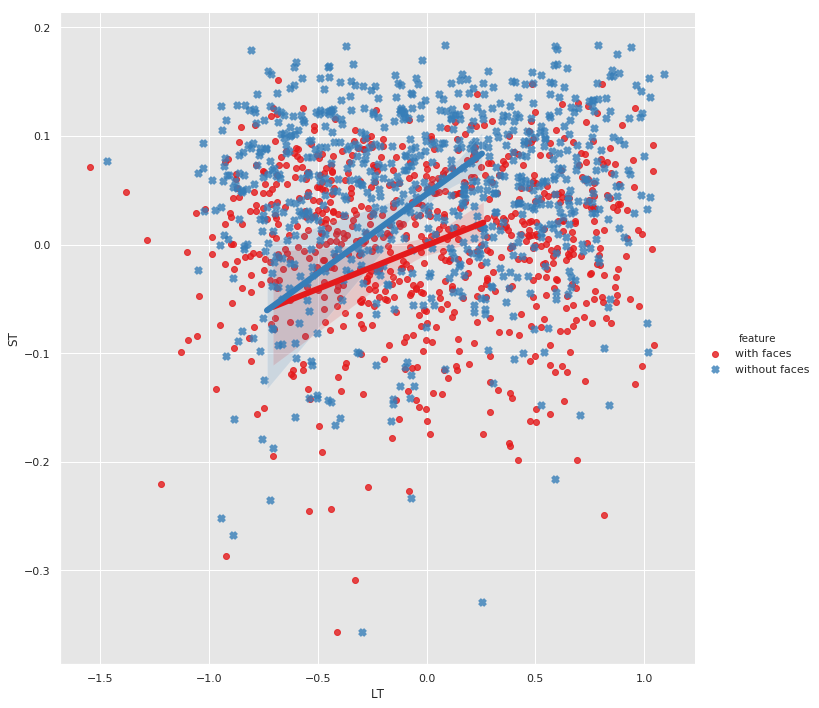

In [ ]:
g = sns.lmplot(x="LT", y="ST", hue="feature",x_jitter=.9,
               truncate=True, height=10, data=df_all_rows, palette="Set1",ci=100,fit_reg=True, markers=["o", "x"],size = 10)  #,robust=True

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={"lines.linewidth": 4})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set(xlim=(100, 100))


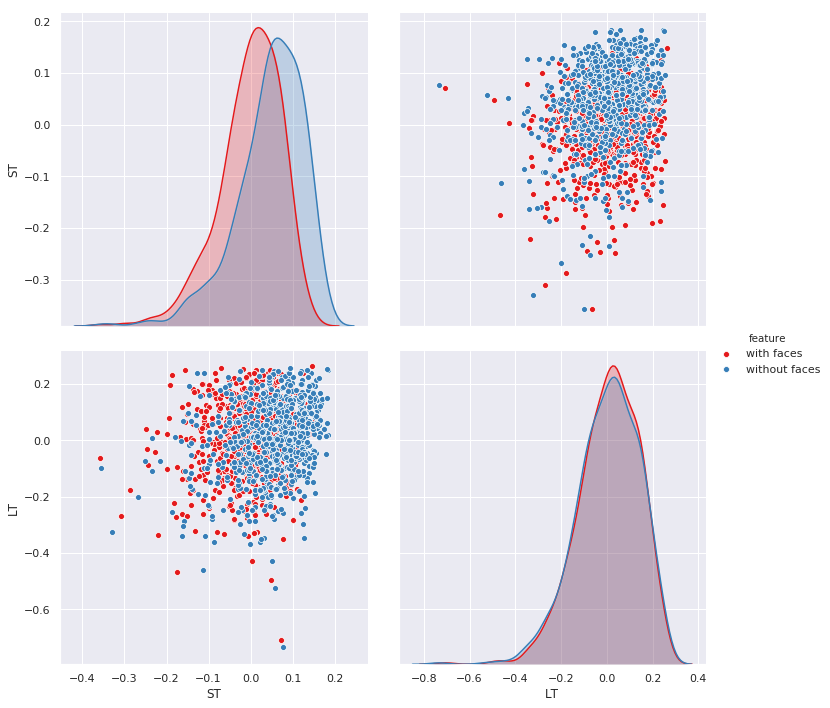

In [ ]:
g = sns.pairplot(df_all_rows, hue="feature", palette="Set1", diag_kind="kde", height=5)

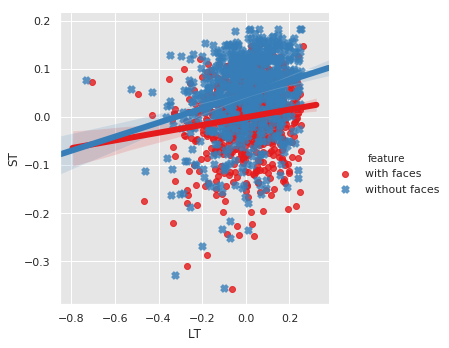

In [ ]:
 g = sns.lmplot(x="LT", y="ST", hue="feature", data=df_all_rows, markers=["o", "x"],palette="Set1")


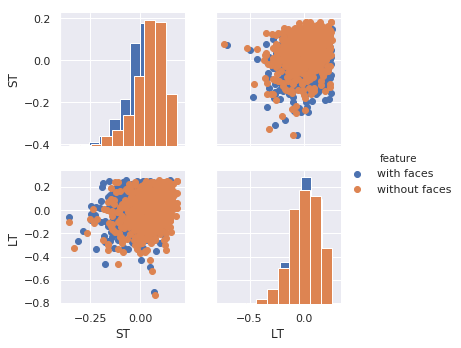

In [ ]:
g = sns.PairGrid(df_all_rows, hue="feature")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();